Keys:

- Home and Kitchen has 17 stores in Canada and 67 in the US.
- Online store in 2007.
- Order ship to anywhere US or Canada.

Problem:

Stable sales

Solutions:

The BOPS initiative

Complications:
- B&M division provides the online division with real-time store availability data for all stores, develop new in-store processes to reliably reserve products in a specific store once a transaction had taken place online.
- Launched just in US

What do we have to do?

- Look into the information to provide more insigth of the result of the BOPS initiative.

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
url1 = "data/BOPS_case/bops_bm.csv"
url2 = "data/BOPS_case/bops_online.csv"

In [64]:
bm = pd.read_csv(url1)
bm.head()

,id (store),year,month,week,usa,after,sales
0,1,2011,4,16,0,0,"118,691"
1,1,2011,4,17,0,0,"113,804"
2,1,2011,4,18,0,0,"172,104"
3,1,2011,5,19,0,0,"105,591"
4,1,2011,5,20,0,0,"94,884"


In [65]:
online = pd.read_csv(url2)
online.head()

,id (DMA),year,month,week,after,close,sales
0,1,2011,4,17,0,1,"18,564"
1,1,2011,4,18,0,1,"30,883"
2,1,2011,5,19,0,1,"37,425"
3,1,2011,5,20,0,1,"32,563"
4,1,2011,5,21,0,1,"35,773"


In [66]:
# removing spaces in the dataframe
online.columns = online.columns.str.replace(' ','')
bm.columns = bm.columns.str.replace(' ','')

In [67]:
# removing the ',' in order to convert te data to numeric type
online['sales'] = online.sales.str.replace(',','')
online['sales'] = online['sales'].astype(int)

bm['sales'] = bm.sales.str.replace(',','')
bm['sales'] = bm['sales'].astype(int)

In [68]:
before_bm = bm[bm['after']==0]
after_bm = bm[bm['after']==1]


In [69]:
before_online = online[online['after']==0]
after_online = online[online['after']==1]


<AxesSubplot:xlabel='after,close,week'>

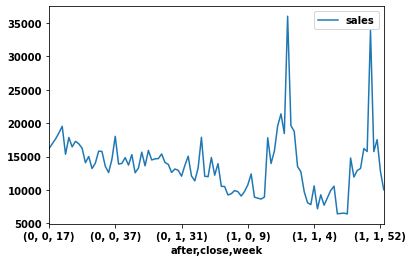

In [70]:
online_grouped = pd.DataFrame(online.groupby(['after','close','week'])['sales'].mean())
online_grouped.plot()

<AxesSubplot:xlabel='usa,after,week'>

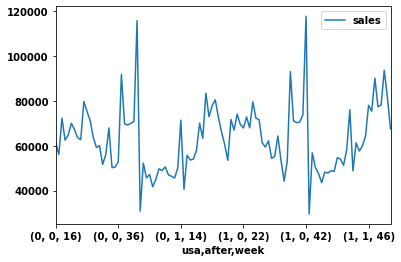

In [71]:
bm_grouped = pd.DataFrame(bm.groupby(['usa','after','week'])['sales'].mean())
bm_grouped.plot()

In [76]:
online_grouped.reset_index(inplace = True)

Analyzing the recolection stores that weren't close, we can see that there is an increment in sales after the implementation of the BOPS. It was not inmediatly, but there was a poitn that set a record in sales.

<AxesSubplot:xlabel='close,after,week'>

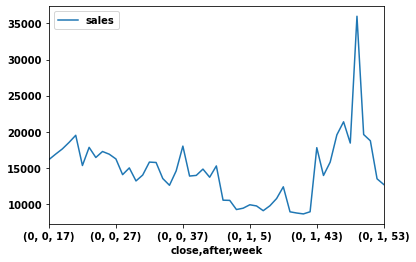

In [81]:
((online_grouped[online_grouped['close']==0]).set_index(["close","after",'week'])).plot()